# 1. 
### a) [Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select an appropriate data set for your experiment and draw graphs.](https://github.com/nonkloq/ml-from-scratch/blob/main/LWR.ipynb)

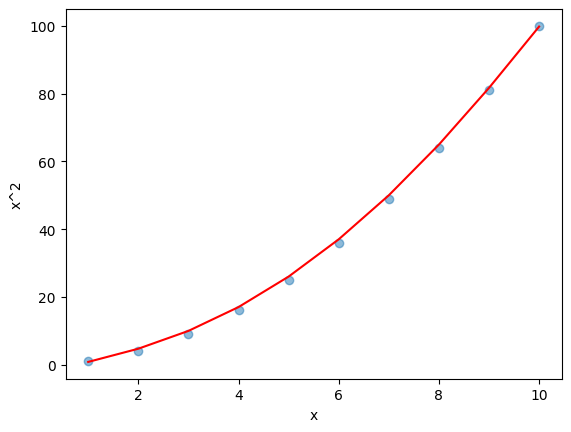

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def gaussian_kernel(xi,X,tau):
    return np.exp(-(xi-X)**2/(2*tau**2))


def LWR(xi, X, y, tau=1):
    weights = gaussian_kernel(xi, X, tau)    
    Phi = np.column_stack((np.ones(len(X)), X))
    W = np.diag(weights)
    theta = np.linalg.inv(Phi.T @ W @ Phi) @ Phi.T @ W @ y
    return np.array([1,xi]) @ theta

X = np.array([1,2,3,4,5,6,7,8,9,10])
y = X**2


plt.scatter(X, y, alpha=0.5)
plt.plot(X, [LWR(xi,X,y) for xi in X], color='red')
plt.xlabel('x')
plt.ylabel('x^2')
plt.show()


### b) Write a Python Program to Generate a Random Number.

In [2]:
print("Random number:", np.random.random())

Random number: 0.8673844335710793


# 2.
### a) [Generate a Python code for the SVM algorithm.](https://github.com/nonkloq/ml-from-scratch/blob/main/linear%20classification.ipynb)

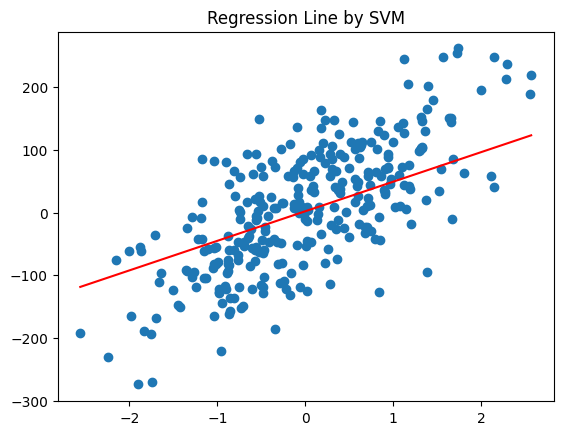

MSE : 4283.432254566232


In [2]:
from sklearn.svm import SVR
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

X, y = make_regression(n_samples=300, n_features=1, n_targets=1,noise = 69,random_state=420)

X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.3)

reg = SVR(kernel="linear").fit(X_tr, y_tr)

xxx = np.linspace(min(X),max(X),100)
plt.scatter(X,y)
plt.plot(xxx,reg.predict(xxx),"r-")
plt.title("Regression Line by SVM")
plt.show()

print("MSE :",mean_squared_error(y_te,reg.predict(X_te)))


### b) Design a Python code to Check Leap Year.
>leap: -4..2020..+4


In [4]:
def isleap(year):
    return year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)

year = int(input("Enter year: "))
print(f"The year {year} is {'a' if isleap(year) else 'not a'} leap year")

Enter year: 1992
The year 1992 is a leap year


#  3.
### a) [Implement the KNN algorithm to classify the dataset using Python.](https://github.com/nonkloq/ml-from-scratch/blob/main/KNN_for_iris.ipynb)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
iris = load_iris()

X_tr,X_te,y_tr,y_te = train_test_split(iris.data,iris.target,test_size=0.3)

clf = KNeighborsClassifier(n_neighbors=11, algorithm='kd_tree').fit(X_tr, y_tr)


print("Accuracy :",accuracy_score(y_te, clf.predict(X_te))*100)

Accuracy : 95.55555555555556


### b) Write a Python Program to Find the Factorial of a Number.


In [6]:
def fact(n):
    if n<=0: return 1
    return n * fact(n-1)

print(fact(5))

120


# 4.
### a) [Generate a Python code for the K-means algorithm.](https://github.com/nonkloq/ml-from-scratch/blob/main/EM_for_GMM_and_Kmeans.ipynb)


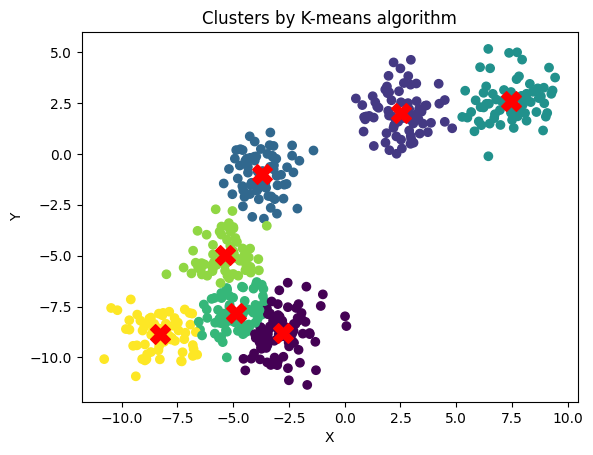

In [7]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

K = 7

X, y = make_blobs(n_samples=500, centers=K,random_state=420)

km = KMeans(n_clusters=K,n_init=K).fit(X)

labels = km.labels_
centers = km.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', color='red', s=200)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clusters by K-means algorithm')
plt.show()

### b) Write a Python Program to Print the Fibonacci sequence.


In [8]:
def fib(n):
	if n<=0:return
	for i in range(min(2,n)):
		print(i,end=" ")
	a=0
	b=1
	c=0
	for i in range(n-2):
		c = a + b
		print(c,end=" ")
		a = b
		b = c
	print()

fib(12)

0 1 1 2 3 5 8 13 21 34 55 89 



# 5.
### a) [Implement the Maximum Margin Classifier algorithm using Python.](https://github.com/nonkloq/ml-from-scratch/blob/main/linear%20classification.ipynb)


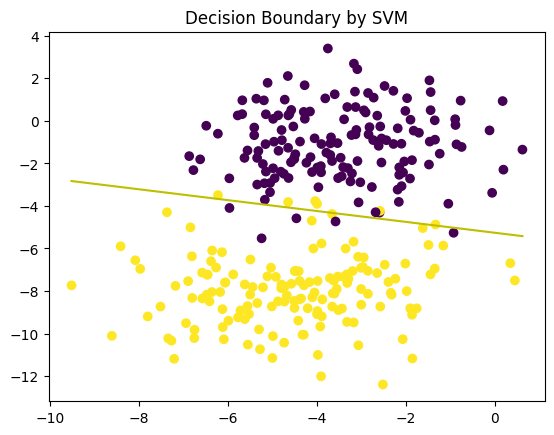

Accuracy : 97.77777777777777


In [9]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_blobs(n_samples=300, centers=2, cluster_std=1.69,random_state=420)

X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.3)

clf = SVC(kernel="linear")
clf.fit(X_tr, y_tr)
betas,intercept = clf.coef_.T, clf.intercept_

x1 = [min(X[:,0]),max(X[:,0])]
x2 = (-betas[0]/betas[1])*x1 + (-intercept/betas[1]) # y = mx+c; x_2 = (m_1*x_1 + c ) / m_2

plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x1,x2,"y-")
plt.title("Decision Boundary by SVM")
plt.show()

print("Accuracy :",accuracy_score(y_te, clf.predict(X_te))*100)

### b) Develop a Python code to Check Armstrong Number.


In [10]:
def isNarc(n):
    x = str(n)
    p = len(x)
    return sum(int(digit)**p for digit in x) == n


print(isNarc(153))
print(isNarc(1634))
print(isNarc(163))

True
True
False



# 6.
### a) [Generate a Python code for the Random Forests algorithm.](https://github.com/nonkloq/ml-from-scratch/blob/main/trees_forest.ipynb)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

iris = load_iris()
X_tr,X_te,y_tr,y_te = train_test_split(iris.data,iris.target,test_size=0.5)

clf = RandomForestClassifier(n_estimators=12,bootstrap=False).fit(X_tr,y_tr)

print("Accuracy :",accuracy_score(y_te, clf.predict(X_te))*100)

Accuracy : 94.66666666666667


### b) Write a Python Program to Make a Simple Calculator.


In [12]:
print("\tCalculator\t")
exp = "-8"
while exp != "exit":
    print(eval(exp))
    exp = input("> ")

	Calculator	
-8
> 6*10+9
69
> 4*100+2*10+0*10
420
> 3**2-9+871
871
> exit




# 7.
### a) [Develop a program for the Perceptron algorithm using Python.](https://github.com/nonkloq/ml-from-scratch/blob/main/linear%20classification.ipynb)

In [13]:
import numpy as np
from sklearn.metrics import accuracy_score

def g(x):
    return np.where(x>0,1,0) # 1 if x>0 else 0

def PLA(X,y,eta,epochs):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    N,M = X.shape
    W = np.zeros((M,1))#np.random.randn(M).reshape(-1,1)

    for i in range(epochs):
        miss=0
        for j in range(N):
            y_hat = g(W.T @ X[j])
            err = y_hat - y[j]
            if err != 0:
                W -= eta* err * X[j].reshape(-1,1)
                miss+=1
        if miss == 0: 
            print(f"Converged at {i+1}th epoch")
            return W
    print("Not Converged")
    return W

X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y = np.array([0,0,0,1]) # AND
W = PLA(X,y,.5,100)
print("Weights: ",W.T)
print("Accuracy: ",accuracy_score(y,g(W[0] + X @ W[1:]))*100)

Converged at 6th epoch
Weights:  [[-1.   1.   0.5]]
Accuracy:  100.0


### b) Design a Python Program to Display Calendar.


In [14]:
import calendar
print(calendar.month(int(input("Year: ")), int(input("Month: "))))


Year: 2001
Month: 9
   September 2001
Mo Tu We Th Fr Sa Su
                1  2
 3  4  5  6  7  8  9
10 11 12 13 14 15 16
17 18 19 20 21 22 23
24 25 26 27 28 29 30



chuesday init

# 8.
### a) [Generate a Python code for the Gradient Descent algorithm.](https://github.com/nonkloq/nn_dqn-from-scratch/blob/main/nn-mlp_from_scratch.ipynb)


In [16]:
import numpy as np

def gradient_descent(X,y,eta=.05,epoch=100): # simple gd alg
    Phi = np.hstack([np.ones((X.shape[0],1)),X])
    M,N = Phi.shape
    W = np.ones(N)
    
    for t in range(epoch):
        W = W + (eta* Phi.T @ (y-(Phi @ W)) )
        if all(y == np.round(W[0] + X @ W[1:])):
            print(f"Converged at {t+1}th epoch")
            return W
    print("Not Converged")
    return W


X = np.array([[1, 1], [1, 2], [1, 3], [1, 4]])
y = np.array([2, 3, 4, 5])


W = gradient_descent(X,y)
print("Learned Bias & Weights :", W)
print(f"True:{y} vs. Preds:{W[0]+ X @ W[1:]}")

Converged at 8th epoch
Learned Bias & Weights : [0.78369483 0.78369483 0.89437595]
True:[2 3 4 5] vs. Preds:[2.46176561 3.35614156 4.25051751 5.14489346]


### b) Write a Python Program to Find the Sum of Natural Numbers Using Recursion.


In [17]:
def nsum(n):
	if n<=0: return 0
	return n + nsum(n-1)

print(nsum(12))

78



# 9.
### a) [Develop a program for Simple Linear Regression algorithm using Python.](https://github.com/nonkloq/ml-from-scratch/blob/main/linear%20regression.ipynb)


m: [83.46312413] and c: [0.84328383]


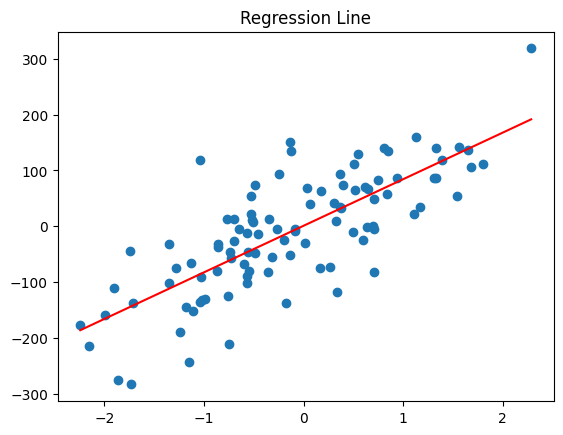

In [18]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=100, n_features=1, n_targets=1, noise=69, random_state=420)

def simple_lr(X,y):
    x_bar = np.mean(X)
    y_bar = np.mean(y)
    N = len(X)
    n,d=0,0
    for i in range(N):
        n += (X[i] - x_bar) * (y[i] - y_bar)
        d += (X[i] - x_bar)**2
    m = n/d # slope COV(X,Y)/COV(X,X)
    c = y_bar - m * x_bar
    return m, c    

m,c = simple_lr(X,y)

bou = np.array([min(X),max(X)])
print(f"m: {m} and c: {c}")
plt.scatter(X,y)
plt.plot(bou,m*bou+c,'r')
plt.title("Regression Line")
plt.show()

### b) Generate a Python Program to Add Two Matrices.


In [19]:
def addM(A,B):
	m,n = len(A),len(A[0])
	if m != len(B) or n != len(B[0]): return
	
	return [[A[i][j]+B[i][j] for j in range(n)] for i in range(m)]


A = [[1,2],[2,1]]
B = [[3,2],[4,2]]
print(addM(A,B))

[[4, 4], [6, 3]]


# 10.
### a) [Write a Python code for the Multiple Linear Regression algorithm.](https://github.com/nonkloq/ml-from-scratch/blob/main/linear%20regression.ipynb)


Parameters : [-0.11478237 55.77933061 61.21427047]


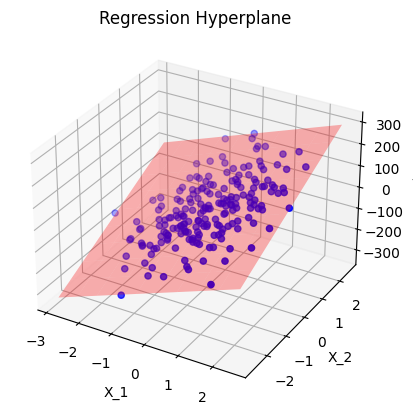

In [22]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X, y = make_regression(n_samples=200, n_features=2, n_targets=1, noise=6.9, random_state=420)

def ols(X,y):
    N = len(X)
    Phi = np.hstack((np.ones((N, 1)), X))
    W = np.linalg.pinv(Phi) @ y
    
    return W

W = ols(X,y)

print("Parameters :",W)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c='b', marker='o')

X1p,X2p = np.meshgrid(np.linspace(min(X[:,0]), max(X[:,0]), 10), np.linspace(min(X[:,1]), max(X[:,1]), 10))
Zp = W[0] + W[1]*X1p + W[2]*X2p
ax.plot_surface(X1p, X2p, Zp, alpha=0.3,color="r")

ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('y')
ax.set_title('Regression Hyperplane')
plt.show()


### b) Design a Python Program to Sort Words in Alphabetic Order.


In [21]:
items = ["aple","able","niker","kie","psdp"]
print(sorted(items))

['able', 'aple', 'kie', 'niker', 'psdp']
